# Trazado tridimensional en Matplotlib

Matplotlib se diseñó inicialmente teniendo en cuenta solo el trazado bidimensional.
En la época del lanzamiento de la versión 1.0, se crearon algunas utilidades de trazado tridimensional sobre la pantalla bidimensional de Matplotlib, y el resultado es un conjunto de herramientas conveniente (aunque algo limitado) para la visualización de datos tridimensionales.
los gráficos tridimensionales se habilitan importando el kit de herramientas ``mplot3d``, incluido con la instalación principal de Matplotlib:

In [ ]:
from mpl_toolkits import mplot3d

Una vez que se importa este submódulo, se pueden crear ejes tridimensionales pasando la palabra clave ``projection='3d'`` a cualquiera de las rutinas normales de creación de ejes:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

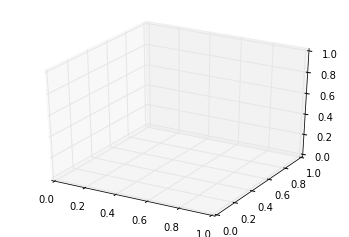

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Con estos ejes tridimensionales habilitados, ahora podemos trazar una variedad de tipos de gráficos tridimensionales.
El trazado tridimensional es una de las funcionalidades que se beneficia enormemente al ver las figuras de forma interactiva en lugar de estática en el cuaderno; recuerda que para usar figuras interactivas, puedes usar ``%matplotlib notebook`` en lugar de ``%matplotlib inline`` al ejecutar este código.

## Puntos y líneas tridimensionales
El diagrama tridimensional más básico es una línea o colección de diagramas de dispersión creados a partir de conjuntos de (x, y, z) triples.
En analogía con los gráficos bidimensionales más comunes discutidos anteriormente, estos pueden crearse usando las funciones ``ax.plot3D`` y ``ax.scatter3D``.
La firma de llamada para estos es casi idéntica a la de sus contrapartes bidimensionales, por lo que puede consultar [Gráficos lineales simples](04.01-Gráficos-lineales-simples.ipynb) y [Gráficos de dispersión simples](04.02-Gráficos-de-dispersión-simples.ipynb) para obtener más información sobre cómo controlar la salida.
Aquí trazaremos una espiral trigonométrica, junto con algunos puntos dibujados al azar cerca de la línea:

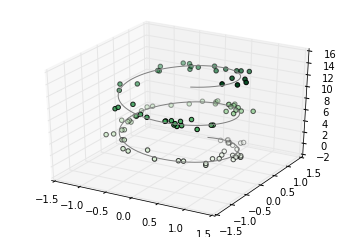

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Tenga en cuenta que, de forma predeterminada, los puntos de dispersión tienen su transparencia ajustada para dar una sensación de profundidad en la página.
Si bien el efecto tridimensional a veces es difícil de ver dentro de una imagen estática, una vista interactiva puede generar una buena intuición sobre el diseño de los puntos.

## Gráficas de contorno tridimensionales
De manera análoga a las gráficas de contorno que exploramos en [Gráficos de densidad y contorno](04.04-Gráficos-de-densidad-y-contorno.ipynb), ``mplot3d`` contiene herramientas para crear gráficas de relieve tridimensionales utilizando las mismas entradas.
Al igual que los gráficos ``ax.contour`` bidimensionales, ``ax.contour3D`` requiere que todos los datos de entrada estén en forma de cuadrículas regulares bidimensionales, con los datos Z evaluados en cada punto.
Aquí mostraremos un diagrama de contorno tridimensional de una función sinusoidal tridimensional:

In [ ]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

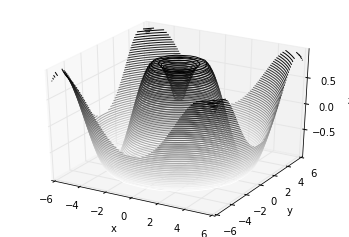

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

A veces, el ángulo de visión predeterminado no es óptimo, en cuyo caso podemos usar el método ``view_init`` para establecer los ángulos de elevación y acimutal. En el siguiente ejemplo, usaremos una elevación de 60 grados (es decir, 60 grados por encima del plano x-y) y un acimut de 35 grados (es decir, girado 35 grados en sentido antihorario sobre el eje z):

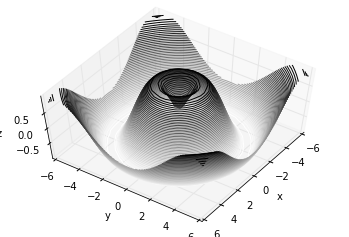

In [ ]:
ax.view_init(60, 35)
fig

Nuevamente, tenga en cuenta que este tipo de rotación se puede lograr de forma interactiva haciendo clic y arrastrando cuando se usa uno de los backends interactivos de Matplotlib.

## Estructuras alámbricas y parcelas de superficie
Otros dos tipos de gráficos tridimensionales que funcionan con datos cuadriculados son las estructuras alámbricas y los gráficos de superficie.
Estos toman una cuadrícula de valores y la proyectan sobre la superficie tridimensional especificada, y pueden hacer que las formas tridimensionales resultantes sean muy fáciles de visualizar.
Aquí hay un ejemplo del uso de una estructura alámbrica:

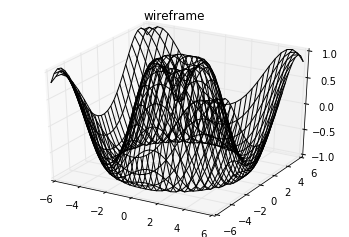

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

Un gráfico de superficie es como un gráfico de estructura alámbrica, pero cada cara de la estructura alámbrica es un polígono relleno.
Agregar un mapa de colores a los polígonos rellenos puede ayudar a percibir la topología de la superficie que se visualiza:

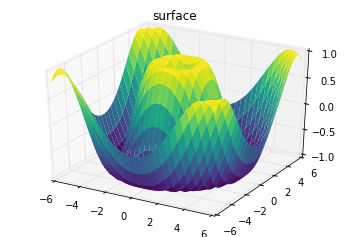

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Tenga en cuenta que aunque la cuadrícula de valores para un gráfico de superficie debe ser bidimensional, no es necesario que sea rectilínea.
Aquí hay un ejemplo de cómo crear una cuadrícula polar parcial, que cuando se usa con el gráfico ``surface3D`` puede darnos una porción de la función que estamos visualizando:

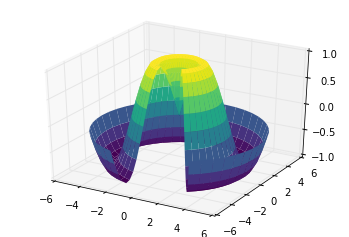

In [ ]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## Triangulaciones de superficie
Para algunas aplicaciones, las cuadrículas muestreadas uniformemente requeridas por las rutinas anteriores son demasiado restrictivas e inconvenientes.
En estas situaciones, los gráficos basados ​​en triangulación pueden ser muy útiles.
¿Qué pasa si en lugar de un sorteo uniforme de una cuadrícula cartesiana o polar, tenemos un conjunto de sorteos aleatorios?

In [ ]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

Podríamos crear un gráfico de dispersión de los puntos para tener una idea de la superficie de la que estamos muestreando:

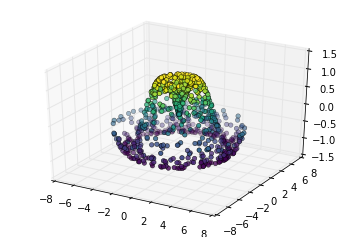

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

Esto deja mucho que desear.
La función que nos ayudará en este caso es ``ax.plot_trisurf``, que crea una superficie al encontrar primero un conjunto de triángulos formados entre puntos adyacentes (recuerde que x, y y z aquí son matrices unidimensionales):

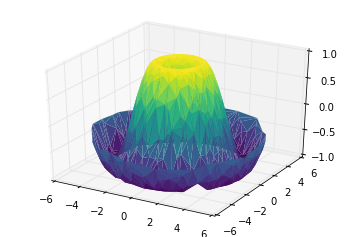

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

El resultado ciertamente no es tan limpio como cuando se traza con una cuadrícula, pero la flexibilidad de tal triangulación permite algunas gráficas tridimensionales realmente interesantes.
Por ejemplo, en realidad es posible trazar una tira de Möbius tridimensional usando esto, como veremos a continuación.

### Ejemplo: visualización de una cinta de Möbius
Una tira de Möbius es similar a una tira de papel pegada en un lazo con medio giro.
Topológicamente, es bastante interesante porque, a pesar de las apariencias, ¡solo tiene un lado!
Aquí visualizaremos dicho objeto usando las herramientas tridimensionales de Matplotlib.
La clave para crear la tira de Möbius es pensar en su parametrización: es una tira bidimensional, por lo que necesitamos dos dimensiones intrínsecas. Llamémoslos $\theta$, que va de $0$ a $2\pi$ alrededor del ciclo, y $w$ que va de -1 a 1 a lo largo de la franja:

In [ ]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Ahora a partir de esta parametrización, debemos determinar las posiciones *(x, y, z)* de la tira incrustada.
Pensando en ello, podríamos darnos cuenta de que están ocurriendo dos rotaciones: una es la posición del bucle sobre su centro (lo que hemos llamado $\theta$), mientras que la otra es la torsión de la tira sobre su eje (nosotros llamaré a esto $\phi$). Para una tira de Möbius, debemos hacer que la tira haga medio giro durante un ciclo completo, o $\Delta\phi = \Delta\theta/2$.

In [ ]:
phi = 0.5 * theta

Ahora usamos nuestra memoria de trigonometría para derivar la incrustación tridimensional.
Definiremos $r$, la distancia de cada punto desde el centro, y usaremos esto para encontrar las coordenadas incrustadas $(x, y, z)$:

In [ ]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finalmente, para graficar el objeto, debemos asegurarnos de que la triangulación sea correcta. La mejor manera de hacer esto es definir la triangulación *dentro de la parametrización subyacente* y luego dejar que Matplotlib proyecte esta triangulación en el espacio tridimensional de la tira de Möbius.
Esto se puede lograr de la siguiente manera:

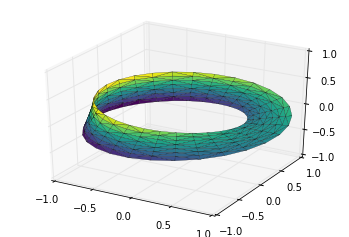

In [ ]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

Combinando todas estas técnicas, es posible crear y mostrar una amplia variedad de objetos y patrones tridimensionales en Matplotlib.